In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("house_price_regression_dataset.csv")

"""
Square_Footage: The size of the house in square feet. Larger homes typically have higher prices.

Num_Bedrooms: The number of bedrooms in the house. More bedrooms generally increase the value of a home.

Num_Bathrooms: The number of bathrooms in the house. Houses with more bathrooms are typically priced higher.

Year_Built: The year the house was built. Older houses may be priced lower due to wear and tear.

Lot_Size: The size of the lot the house is built on, measured in acres. Larger lots tend to add value to a property.

Garage_Size: The number of cars that can fit in the garage. Houses with larger garages are usually more expensive.

Neighborhood_Quality: A rating of the neighborhood’s quality on a scale of 1-10, where 10 indicates a high-quality neighborhood. 
    Better neighborhoods usually command higher prices.

House_Price (Target Variable): The price of the house, which is the dependent variable you aim to predict.
"""

In [3]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [4]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [6]:
df.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [7]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [8]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.60,0,5,262382.85
1,4272,3,3,2016,4.75,1,6,985260.85
2,3592,1,2,2016,3.63,0,9,777977.39
3,966,1,2,1977,2.73,1,8,229698.92
4,4926,2,1,1993,4.70,0,8,1041740.86


In [9]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,2815.42,2.99,1.97,1986.55,2.78,1.02,5.62,618861.02
std,1255.51,1.43,0.82,20.63,1.30,0.81,2.89,253568.06
min,503.00,1.00,1.00,1950.00,0.51,0.00,1.00,111626.85
25%,1749.50,2.00,1.00,1969.00,1.67,0.00,3.00,401648.23
50%,2862.50,3.00,2.00,1986.00,2.81,1.00,6.00,628267.29
75%,3849.50,4.00,3.00,2004.25,3.92,2.00,8.00,827141.28
max,4999.00,5.00,3.00,2022.00,4.99,2.00,10.00,1108236.84


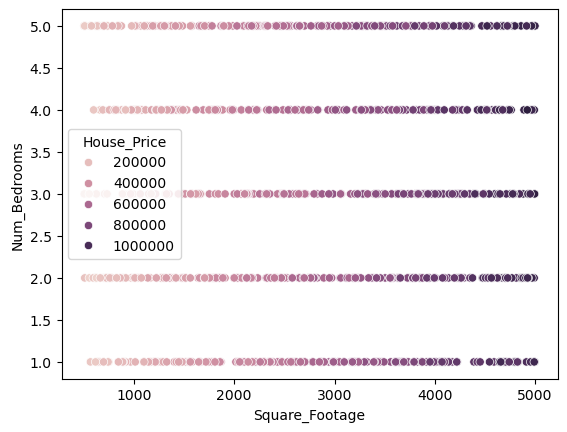

In [10]:
sns.scatterplot(x=df["Square_Footage"], y=df["Num_Bedrooms"], hue=df["House_Price"])
plt.show()

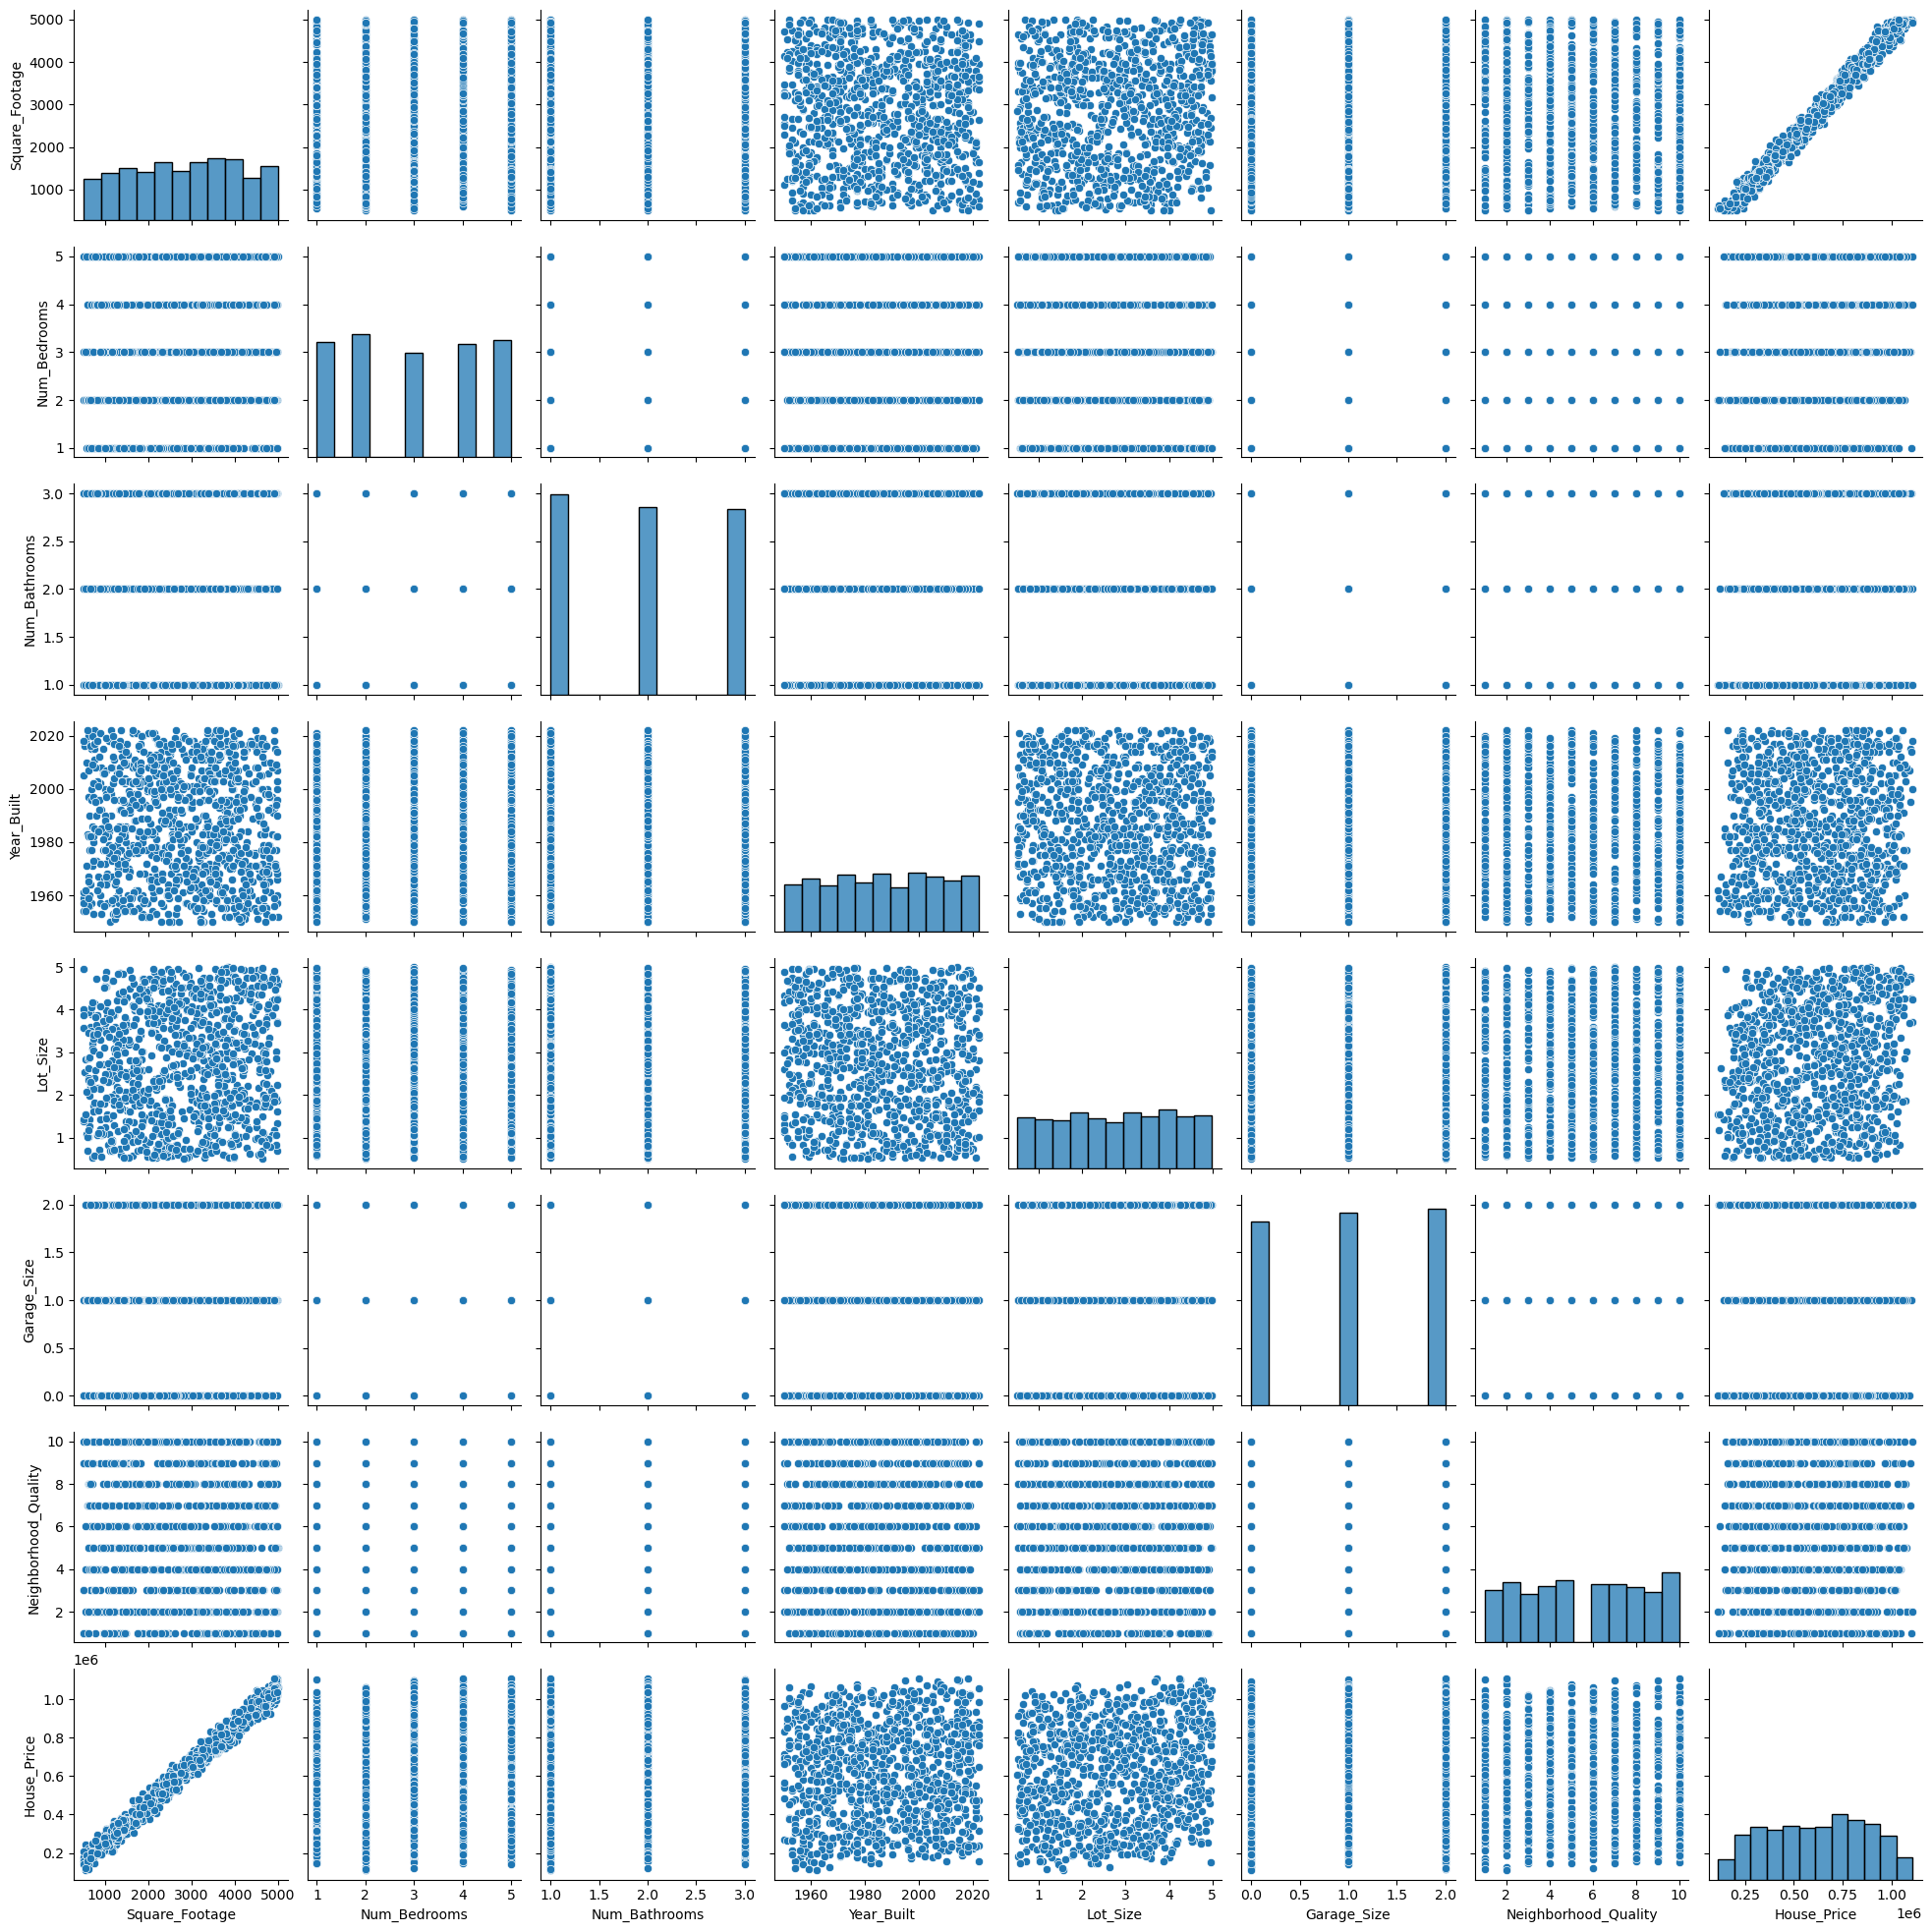

In [11]:
sns.pairplot(df)
plt.show()

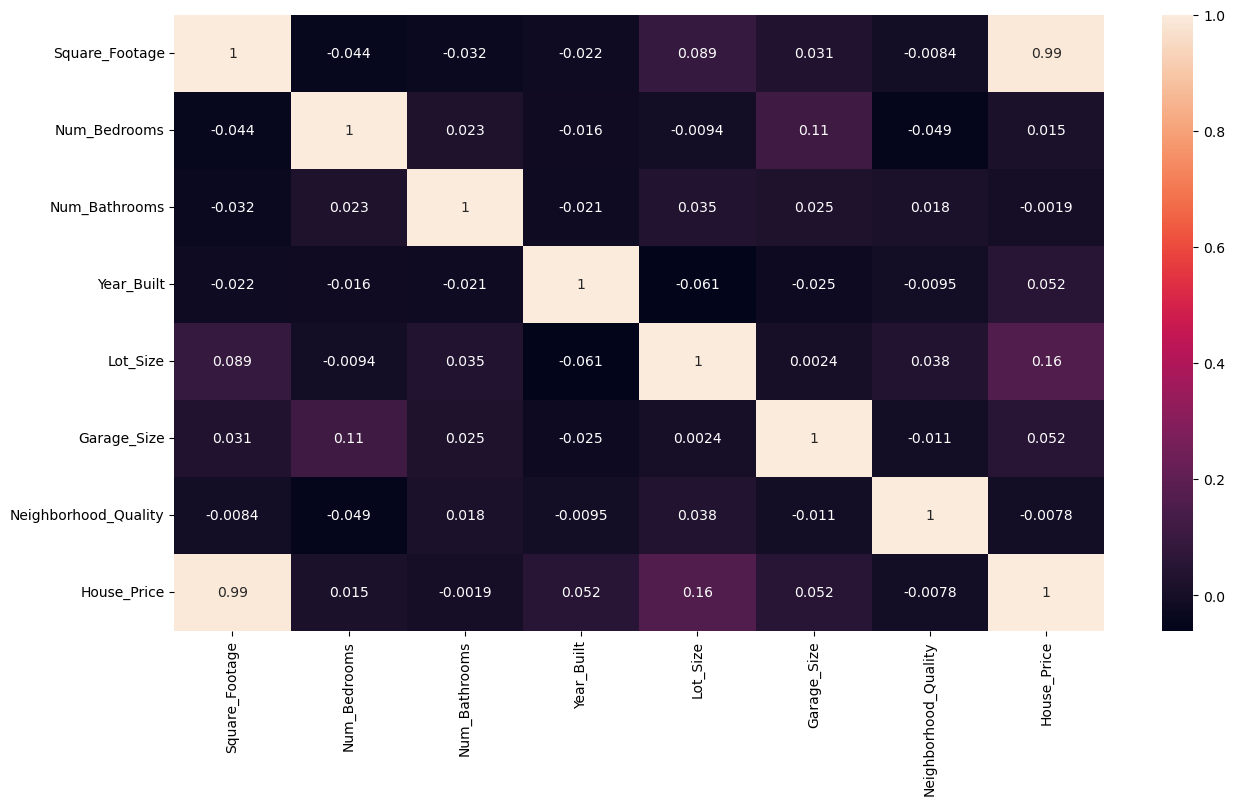

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [13]:
def correlation_for_dropping(df, threshold):
    columns_to_drop = set()
    corr = df.corr(numeric_only=True)
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold:
                colname =corr.columns[i]
                columns_to_drop.add(colname)
    return columns_to_drop

In [14]:
correlation_for_dropping(df, 0.8)

{'House_Price'}

In [17]:
df["Num_Bedrooms"].value_counts()

Num_Bedrooms
2    215
5    205
1    201
4    197
3    182
Name: count, dtype: int64

In [18]:
df["Num_Bathrooms"].value_counts()

Num_Bathrooms
1    350
2    327
3    323
Name: count, dtype: int64

In [19]:
df["Year_Built_New"] = pd.cut(df["Year_Built"], bins=3, labels=["old", "medium", "new"], include_lowest=True)

In [20]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,Year_Built_New
0,1360,2,1,1981,0.60,0,5,262382.85,medium
1,4272,3,3,2016,4.75,1,6,985260.85,new
2,3592,1,2,2016,3.63,0,9,777977.39,new
3,966,1,2,1977,2.73,1,8,229698.92,medium
4,4926,2,1,1993,4.70,0,8,1041740.86,medium


In [21]:
df["Year_Built_New"].value_counts()

Year_Built_New
medium    341
new       334
old       325
Name: count, dtype: int64

In [22]:
df[df["Year_Built_New"] == "old"]["Year_Built"].min()

1950

In [23]:
df[df["Year_Built_New"] == "old"]["Year_Built"].max()

1974

In [24]:
df[df["Year_Built_New"] == "medium"]["Year_Built"].min()

1975

In [25]:
df[df["Year_Built_New"] == "medium"]["Year_Built"].max()

1998

In [26]:
df[df["Year_Built_New"] == "new"]["Year_Built"].max()

2022

In [27]:
df[df["Year_Built_New"] == "new"]["Year_Built"].min()

1999

In [28]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,Year_Built_New
0,1360,2,1,1981,0.60,0,5,262382.85,medium
1,4272,3,3,2016,4.75,1,6,985260.85,new
2,3592,1,2,2016,3.63,0,9,777977.39,new
3,966,1,2,1977,2.73,1,8,229698.92,medium
4,4926,2,1,1993,4.70,0,8,1041740.86,medium


In [29]:
df.drop("Year_Built", axis=1, inplace=True)

In [30]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,Year_Built_New
0,1360,2,1,0.60,0,5,262382.85,medium
1,4272,3,3,4.75,1,6,985260.85,new
2,3592,1,2,3.63,0,9,777977.39,new
3,966,1,2,2.73,1,8,229698.92,medium
4,4926,2,1,4.70,0,8,1041740.86,medium


In [31]:
X = df.drop("House_Price", axis=1)
y = df["House_Price"]

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [34]:
X_train.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Lot_Size,Garage_Size,Neighborhood_Quality,Year_Built_New
298,4347,3,1,4.23,1,3,old
160,4996,5,1,1.87,0,8,new
268,1684,5,3,4.05,1,8,medium
658,4643,1,3,4.56,2,3,new
996,3179,1,2,2.98,1,10,new


In [35]:
X_test.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Lot_Size,Garage_Size,Neighborhood_Quality,Year_Built_New
507,2031,3,2,4.73,2,10,medium
818,1754,2,2,0.92,2,4,medium
452,1667,1,2,1.37,1,8,old
368,4230,3,1,3.08,1,9,old
242,3854,2,1,3.27,1,8,old


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [37]:
cols = ["Square_Footage", "Num_Bedrooms", "Num_Bathrooms", "Lot_Size", "Garage_Size", "Neighborhood_Quality"]

In [38]:
scaler = ColumnTransformer(transformers=[
    ("cols", StandardScaler(), cols)
], remainder="passthrough"
                          )
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
col_names = scaler.get_feature_names_out()

In [40]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_names)

In [41]:
X_train_scaled.head()

,cols__Square_Footage,cols__Num_Bedrooms,cols__Num_Bathrooms,cols__Lot_Size,cols__Garage_Size,cols__Neighborhood_Quality,remainder__Year_Built_New
0,1.22,-0.05,-1.22,1.10,-0.01,-0.91,old
1,1.73,1.37,-1.22,-0.72,-1.22,0.83,new
2,-0.90,1.37,1.21,0.96,-0.01,0.83,medium
3,1.45,-1.46,1.21,1.35,1.21,-0.91,new
4,0.29,-1.46,-0.00,0.13,-0.01,1.52,new


In [42]:
# Ordinal Encoding
mapping = {"old" : 0,
           "medium" : 1,
           "new" : 2
          }

In [43]:
X_train_scaled["Year_Built_Encoded"] = X_train_scaled["remainder__Year_Built_New"].map(mapping)
X_test_scaled["Year_Built_Encoded"] = X_test_scaled["remainder__Year_Built_New"].map(mapping)

In [44]:
X_train_scaled.drop("remainder__Year_Built_New", axis=1, inplace=True)
X_test_scaled.drop("remainder__Year_Built_New", axis=1, inplace=True)

In [45]:
X_train_scaled.head()

,cols__Square_Footage,cols__Num_Bedrooms,cols__Num_Bathrooms,cols__Lot_Size,cols__Garage_Size,cols__Neighborhood_Quality,Year_Built_Encoded
0,1.22,-0.05,-1.22,1.10,-0.01,-0.91,0
1,1.73,1.37,-1.22,-0.72,-1.22,0.83,2
2,-0.90,1.37,1.21,0.96,-0.01,0.83,1
3,1.45,-1.46,1.21,1.35,1.21,-0.91,2
4,0.29,-1.46,-0.00,0.13,-0.01,1.52,2


In [46]:
X_test_scaled.head()

,cols__Square_Footage,cols__Num_Bedrooms,cols__Num_Bathrooms,cols__Lot_Size,cols__Garage_Size,cols__Neighborhood_Quality,Year_Built_Encoded
0,-0.62,-0.05,-0.00,1.48,1.21,1.52,1
1,-0.84,-0.75,-0.00,-1.46,1.21,-0.56,1
2,-0.91,-1.46,-0.00,-1.11,-0.01,0.83,0
3,1.12,-0.05,-1.22,0.21,-0.01,1.17,0
4,0.83,-0.75,-1.22,0.36,-0.01,0.83,0


In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
model = DecisionTreeRegressor()

In [49]:
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [51]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score: ", r2_score(y_test, y_pred))

Mean Absolute Error:  26537.311711572776
Mean Squared Error:  1107375542.8997517
Root Mean Squared Error:  33277.252634491204
R2 Score:  0.9820608569813629


In [52]:
# Hyperparameter Tuning

In [53]:
param = {
    "criterion" : ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "splitter" : ["best", "random"],
    "max_depth" : [1, 2, 3, 4, 5, 15, None],
    "min_samples_leaf" : [1, 5, 10, 15, 20],
    "max_features" : ["sqrt", "log2", None]
}

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param, cv=5, n_jobs=-1)

In [56]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 15, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 5, 10, 15, 20],
                         'splitter': ['best', 'random']})

In [57]:
y_pred = grid.predict(X_test_scaled)

In [58]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 15,
 'max_features': None,
 'min_samples_leaf': 5,
 'splitter': 'best'}

In [59]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score: ", r2_score(y_test, y_pred))

Mean Absolute Error:  25291.422659413798
Mean Squared Error:  1002111045.7846737
Root Mean Squared Error:  31656.1375689561
R2 Score:  0.9837661094412353
